In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Alternatives'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-25 to 2019-07-03 - 12'

In [7]:
quote.drop_mask()
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 8) & (stat['shrp'] > 0.4)]
stat

,len,mean,std,shrp,drawdown
Symbols,,,,,
XLRE,29,2.840800,1.585045,1.692109,4.835459
ICF,29,2.302984,1.482848,1.446038,4.991450
IYR,29,2.002579,1.517244,1.215262,4.963136
VNQ,29,2.005711,1.528630,1.208259,5.135487
REET,29,1.472584,1.123622,1.169302,3.361345
RWX,29,1.174433,0.984184,1.032025,1.910171
USRT,29,1.542617,1.352212,1.023425,5.198662
RWO,29,1.225260,1.148964,0.928254,3.132428
RWR,29,1.303047,1.400274,0.817209,4.950217


Populating the interactive namespace from numpy and matplotlib
evicted IYR 0.9952839435373291
evicted VNQ 0.9662405509218318
evicted RWR 0.9981179082079119
evicted SCHH 0.9836922591210254
evicted RWO 0.9761121024819096
evicted USRT 0.9318588917922079
evicted VNQI 0.8950589989829485
evicted REET 0.8387816562395922
evicted ICF 0.9547749778724406
{'RWX': 0.37, 'XLRE': 0.63}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,2.227819,1.166031,-0.264307,1.522907,2.434944,3.021252,4.330159,1.774471,3.367345
XLRE,29.0,2.840800,1.585045,-0.222032,1.914735,2.807312,3.731914,5.464639,1.692109,4.835459
RWX,29.0,1.174433,0.984184,-0.517056,0.516256,1.034133,2.073037,3.396912,1.032025,1.910171


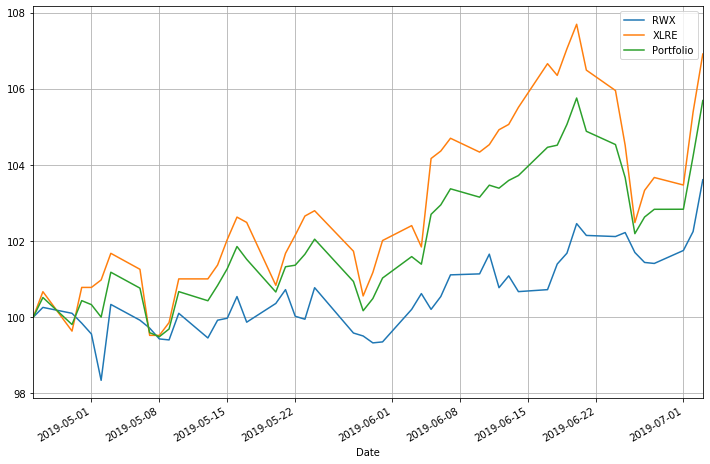

In [6]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)